In [86]:
import json
import pandas as pd

file = "jazz_at_lincoln_center's_jazz_academy.json"
data = None
with open (file, 'r') as f:
    data = json.load(f)
    
channel_id, stats= data.popitem()
print(channel_id)
channel_statistics = stats["channel_statistics"]
video_stats = stats["video_data"]


UC8ycFlguVIToxRB34x3g1eQ


In [87]:
#Channel stats
print('views', channel_statistics['viewCount'])
print('subs', channel_statistics['subscriberCount'])
print('video amount', channel_statistics['videoCount'])

views 23940107
subs 222000
video amount 747


In [88]:
#Video stats
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]['viewCount']), reverse= True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    comments = int(vid[1]['commentCount'])
    date = vid[1]['publishedAt']
    stats.append([title, views, likes, comments, date])

In [89]:
df = pd.DataFrame(stats, columns= ['title', 'views', 'likes', 'comments', 'date'])
df.head(10)

,title,views,likes,comments,date
0,Tips for Playing in a Jazz Rhythm Section,102436,3926,116,2021-07-16T18:28:51Z
1,"Tips on Playing Soprano Saxophone, Part One",56980,1666,75,2020-10-14T13:52:21Z
2,Elements of Style in Jazz Singing,24960,1133,37,2020-11-09T20:56:54Z
3,Jazz at Lincoln Center Presents: Let Freedom S...,23435,780,33,2020-10-31T23:54:26Z
4,Essentially Ellington 2021: Topsy by the JLCO ...,20911,391,8,2021-09-27T11:00:01Z
5,"Tips on Playing Soprano Saxophone, Part Two",15763,445,18,2020-10-14T13:52:35Z
6,Essentially Ellington 2021: Black Butterfly by...,15210,294,12,2021-09-27T11:00:10Z
7,"Tips on Playing Soprano Saxophone, Part Three",15125,473,30,2020-10-14T13:52:45Z
8,Classical Vocals and Jazz Vocals,14160,652,37,2021-03-18T05:22:05Z
9,Essentially Ellington 2021: Blue Room by the J...,13571,307,11,2021-09-27T11:00:00Z


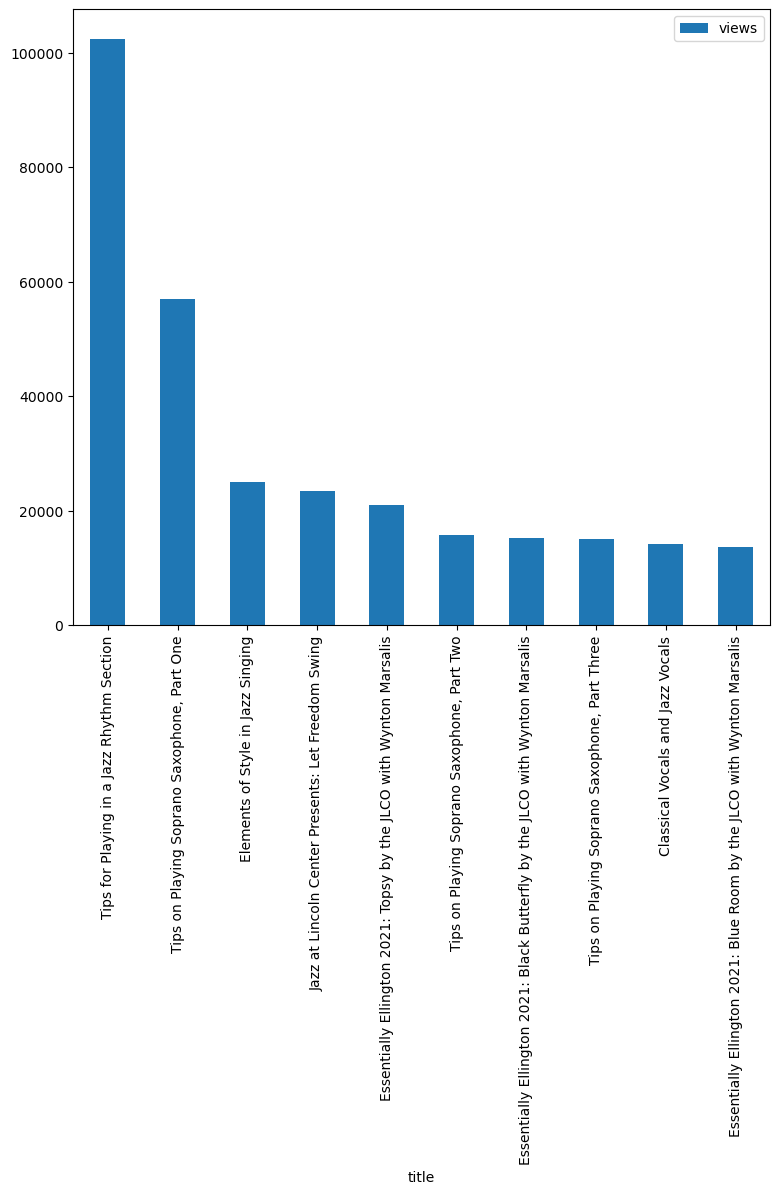

In [90]:
#Top 10 videos
top10 = df.head(10)
ax = top10.plot.bar(x = 'title', y = 'views', figsize= (9, 8), fontsize= 10)

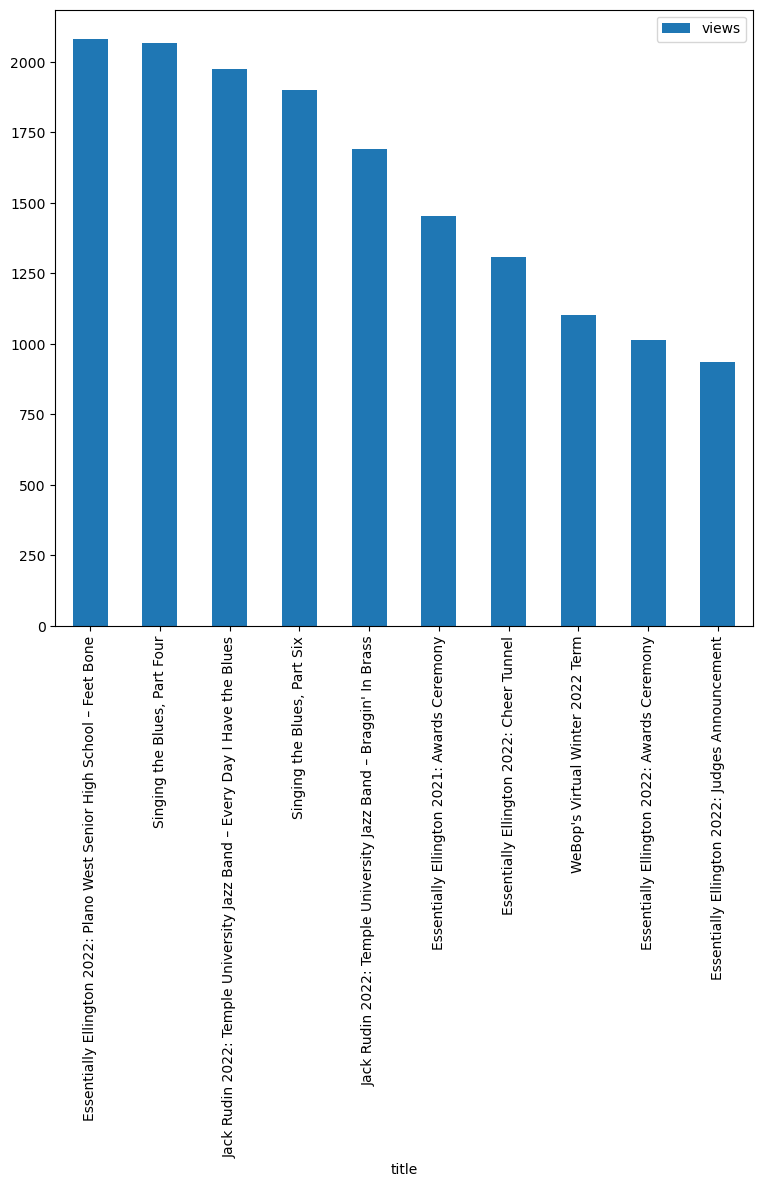

In [91]:
#Bottom 10 videos
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x = 'title', y = 'views', figsize= (9, 8), fontsize= 10)

In [94]:
#Likes and comments per video
likes_avg = top10['likes'].mean()
comments_avg = round(top10['comments'].mean(), 2)
print ('Top 10')
print ('Average likes', likes_avg)
print ('Average comments', comments_avg)
print ('\n')
#Bottom videos, likes and comments avg
likes_avg = bottom10['likes'].mean()
comments_avg = round(bottom10['comments'].mean(), 2)
print ('Bottom 10')
print ('Average likes', likes_avg)
print ('Average comments', comments_avg)



Top 10
Average likes 1006.7
Average comments 37.7


Bottom 10
Average likes 42.7
Average comments 2.6
